<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Need)</span></div>

## 1 Random Numbers

### 1.1 Real and Pseudo Random Numbers

### 1.2 NumPy’s PRNG

In [1]:
np.random.rand()

0.7521717449878998

In [2]:
np.random.rand(10)

array([0.59853972, 0.84891379, 0.84452518, 0.58782641, 0.02153048,
       0.75051591, 0.64915436, 0.01825594, 0.44446119, 0.3312616 ])

In [3]:
np.random.rand(5,2)

array([[0.50830231, 0.0234473 ],
       [0.99262095, 0.22519589],
       [0.52344273, 0.07197195],
       [0.60647691, 0.08679918],
       [0.95068759, 0.08667417]])

In [4]:
n = 10000
random_numbers = np.random.rand(n)
np.sum(random_numbers<.5)/ n*100

49.669999999999995

In [5]:
n = 10000
random_numbers = np.random.rand(n)
np.sum(random_numbers<.25)/ n*100

24.8

In [8]:
n = 10000
random_numbers = np.random.rand(n)
np.sum(random_numbers >.75)/ n*100

24.169999999999998

### 1.3 A simple graphical test

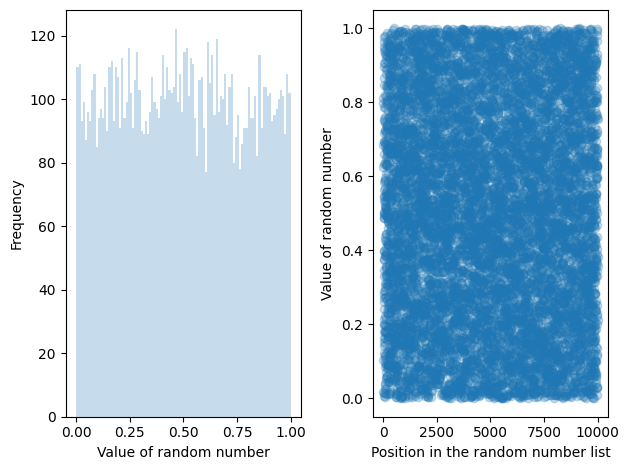

In [15]:
n = 10000
random_numbers = np.random.rand (n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

plt.tight_layout()
plt.show()


### 1.4 Uniformly beyond \([0,1)\)

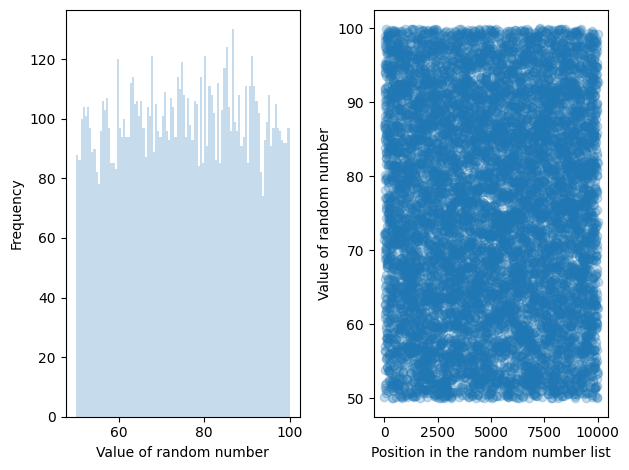

In [25]:
n = 10000
random_numbers = np.random.uniform(low=50, high=100, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

plt.tight_layout()
plt.show()

### 1.5 ‘seeding’ a PRNG

In [26]:
np.random.randint(0, 100, 10)

array([73,  7, 97, 73, 71, 24,  6, 21, 42, 72])

In [27]:
np.random.randint(0, 100, 10)

array([49, 67, 39,  7, 75, 25, 90, 84, 44, 63])

In [28]:
np.random.seed(1234)
np.random.randint(0, 100, 10)

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

In [29]:
np.random.seed(1234)
np.random.randint(0, 100, 10)

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

## 2 Simulating a Magic-8 Ball

In [30]:
def shake_magic_8():
    options = ['It is certain.', 'It is decidedly so.',
               'Without a doubt.', 'Yes definitely.',
               'You may rely on it.', 'As I see it, yes.',
               'Most likely.', 'Outlook good.',
               'Yes.', 'Signs point to yes.',
               'Reply hazy, try again.', 'Ask again later.',
               'Better not tell you now.', 'Cannot predict now.',
               'Concentrate and ask again.', 'Don\'t count on it.',
               'My reply is no.', 'My sources say no.',
               'Outlook not so good.', 'Very doubtful.']

    return np.random.choice(options)


In [31]:
questions = ['Will I be pretty?',
             'Will I be rich?',
             'Will I be in trouble?']

for question in questions:
    print(f'Q: {question}')
    print(f'A: {shake_magic_8()}\n')

Q: Will I be pretty?
A: Ask again later.

Q: Will I be rich?
A: Better not tell you now.

Q: Will I be in trouble?
A: My reply is no.



## 3 Flipping Coins

### 3.1 A fair coin

In [32]:
np.random.choice(['Head', 'Tails'])

'Head'

In [33]:
no_of_coins = 10
np.random.choice(['Head', 'Tails'], no_of_coins)

array(['Tails', 'Head', 'Tails', 'Tails', 'Head', 'Head', 'Tails', 'Head',
       'Head', 'Tails'], dtype='<U5')

In [35]:
def flip_coins(no_of_coins=1, probability=.5):
    results = np.random.rand(no_of_coins)
    no_of_heads = np.sum(results > probability)
    return no_of_heads
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 51.60%


### 3.2 A biased coin

In [36]:
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins, probability = .3)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 66.70%


### 3.3 A flipping experiment

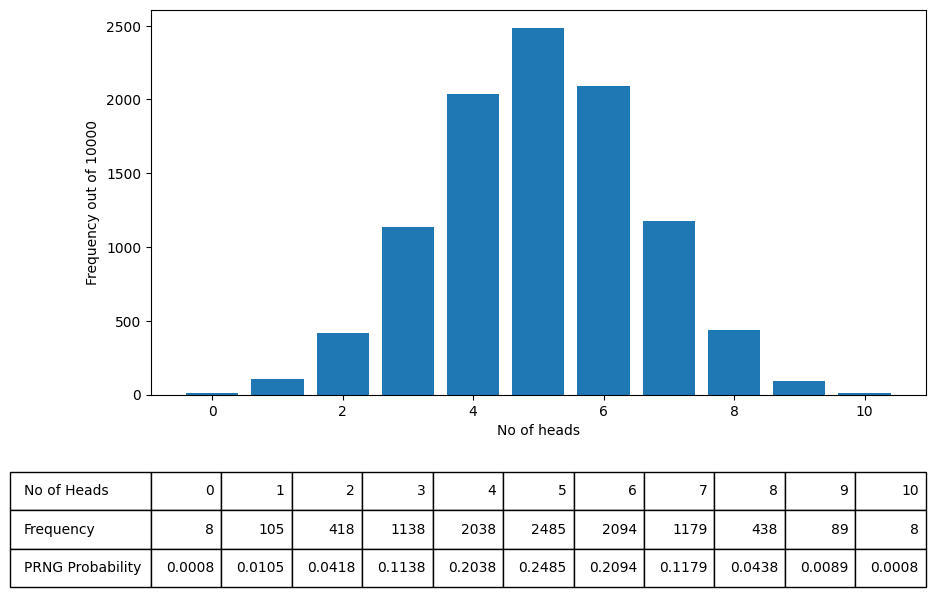

In [42]:
from matplotlib import pyplot as plt

no_of_repeats = 10_000
result = [flip_coins(no_of_coins=10) for _ in range(no_of_repeats)]
no_of_heads, heads_counts = np.unique(result, return_counts=True)
heads_probability = heads_counts/no_of_repeats

plt.rcParams["figure.figsize"] = (10,5)
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability],
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability'],
          loc='bottom',
          bbox=[0,-0.5,1,0.3])

In [44]:
pip install SciPy

     --------------------------------------- 42.5/42.5 MB 29.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
from scipy.stats import binom

In [46]:
binom.pmf(k=7, n=10, p=.5)


0.11718749999999996

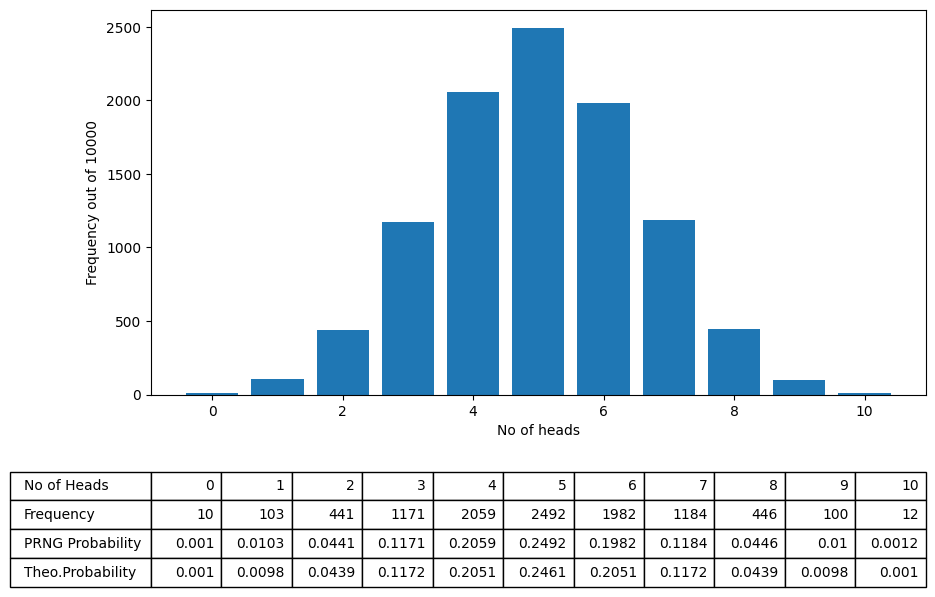

In [48]:
no_of_repeats = 10_000
result = [flip_coins(no_of_coins=10) for _ in range(no_of_repeats)]
no_of_heads, heads_counts = np.unique(result, return_counts=True)
heads_probability = heads_counts/no_of_repeats
binomial_probabilities = binom.pmf(k=no_of_heads, n=10, p=.5)

plt.rcParams["figure.figsize"] = (10,5)
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability, np.round(binomial_probabilities, decimals = 4)],
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability','Theo.Probability'],
          loc='bottom',
          bbox=[0,-0.5,1,0.3])

## Exercise 1 :  12C, 13C

In [5]:
#1
import numpy as np
def Carbon_13(no_of_atoms = 27, probability=.9889):
    results=np.random.rand(no_of_atoms)
    no_of_13carbon = np.sum(results>probability)
    return no_of_13carbon

In [7]:
no_of_repeats = 10_000
result = [Carbon_13() for _ in range (no_of_repeats)]
print(f'The mean of 13C atoms is {np.mean(result)} and standard deviation is {np.std(result)}.')

The mean of 13C atoms is 0.298 and standard deviation is 0.543319427224906.


In [11]:
#2
no_of_repeats=10_000
outcome=[Carbon_13()==0 for _ in range (no_of_repeats)]
x=0

for a in outcome: 
    if a == True:
        x+=1
        
Probability_of_carbon13 = x/no_of_repeats

print(Probability_of_carbon13)

0.7534
